In [6]:
import pandas as pd
df = pd.read_csv('/content/flipkart_data.csv')
df.head(10)

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
5,Awsome sound powerful bass battery backup is a...,5
6,This product sound is clear and excellent bass...,4
7,Should u buy this---Pros:-1. Sound quality and...,4
8,"First of all, I want to talk about sound quali...",5
9,Good looking Super Fine clear Sound and power ...,5


<Axes: xlabel='rating', ylabel='count'>

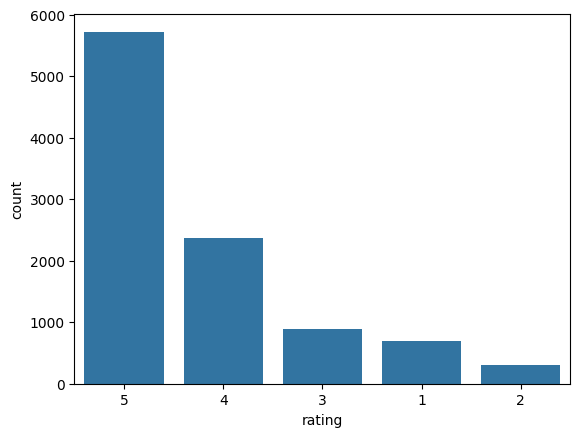

In [2]:
import seaborn as sns

sns.countplot(data=df,
              x='rating',
              order=df.rating.value_counts().index)

**Data preprocessing**

Rating > 3 : positive

Rating = 3 : neutral

Rating < 3 : negative


In [7]:
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x > 3
                                    else 'negative' if x < 3
                                    else 'neutral')
df = df[['review' ,'sentiment']]
df.head(10)

,review,sentiment
0,It was nice produt. I like it's design a lot. ...,positive
1,awesome sound....very pretty to see this nd th...,positive
2,awesome sound quality. pros 7-8 hrs of battery...,positive
3,I think it is such a good product not only as ...,positive
4,awesome bass sound quality very good bettary l...,positive
5,Awsome sound powerful bass battery backup is a...,positive
6,This product sound is clear and excellent bass...,positive
7,Should u buy this---Pros:-1. Sound quality and...,positive
8,"First of all, I want to talk about sound quali...",positive
9,Good looking Super Fine clear Sound and power ...,positive


Removing punctuations

Converting to lower case and removing stopwords

Lemmatization

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text_data):
    preprocessed_text = []
    lemmatizer = WordNetLemmatizer()

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_sentence = ' '.join(
            lemmatizer.lemmatize(token.lower()) for token in nltk.word_tokenize(sentence)
            if token.lower() not in stopwords.words('english')
        )

        preprocessed_text.append(preprocessed_sentence)

    return preprocessed_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
preprocessed_review = preprocess_text(df['review'].values)
df['review'] = preprocessed_review
df.head(10)


100%|██████████| 9976/9976 [00:22<00:00, 436.12it/s]


,review,sentiment
0,nice produt like design lot easy carry looked ...,positive
1,awesome soundvery pretty see nd sound quality ...,positive
2,awesome sound quality pro 78 hr battery life i...,positive
3,think good product per quality also design qui...,positive
4,awesome bass sound quality good bettary long l...,positive
5,awsome sound powerful bass battery backup also...,positive
6,product sound clear excellent bass obviously g...,positive
7,u buy thispros1 sound quality build quality aw...,positive
8,first want talk sound quality sound quality be...,positive
9,good looking super fine clear sound power full...,positive


No charts were generated by quickchart


Applying label encoding to the sentiment columns

0-negative

1-neutral

2-positive

In [242]:
from sklearn.preprocessing import LabelEncoder
label_enco = LabelEncoder()
df['sentiment'] = label_enco.fit_transform(df['sentiment'])
df.head(10)

,review,sentiment
0,nice produt like design lot easy carry looked ...,2
1,awesome soundvery pretty see nd sound quality ...,2
2,awesome sound quality pro 78 hr battery life i...,2
3,think good product per quality also design qui...,2
4,awesome bass sound quality good bettary long l...,2
5,awsome sound powerful bass battery backup also...,2
6,product sound clear excellent bass obviously g...,2
7,u buy thispros1 sound quality build quality aw...,2
8,first want talk sound quality sound quality be...,2
9,good looking super fine clear sound power full...,2


<Axes: xlabel='sentiment', ylabel='count'>

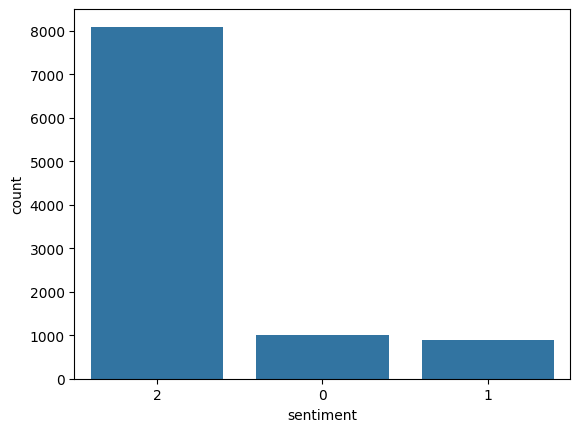

In [14]:
sns.countplot(data=df,
              x='sentiment',
              order=df.sentiment.value_counts().index)

**Exploratory Data Analysis**

Positive sentiment

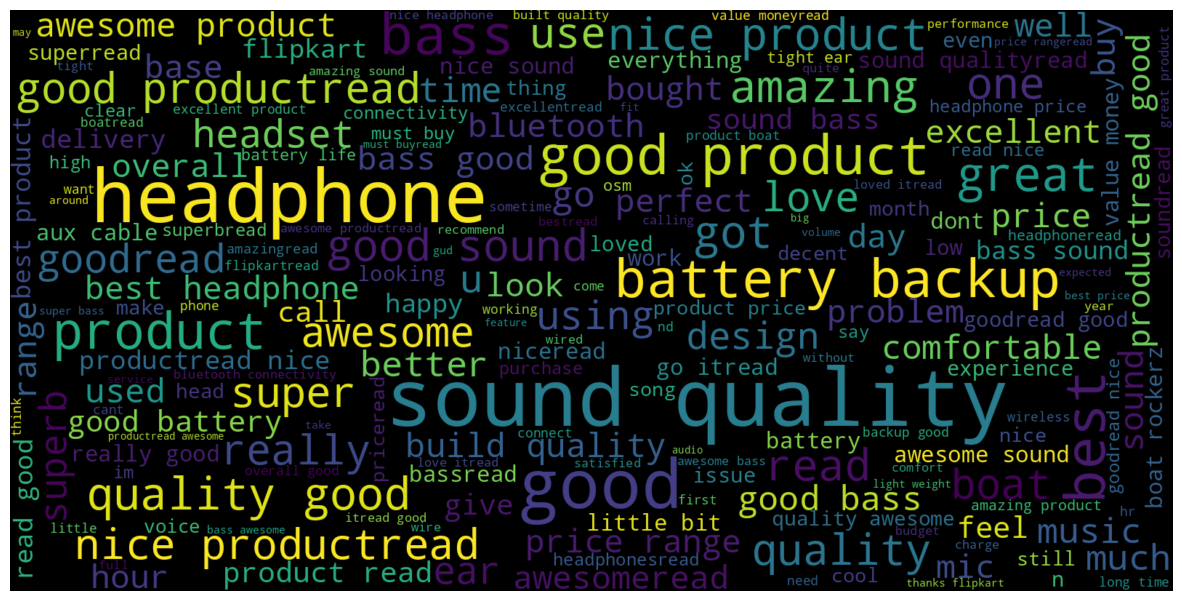

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
consolidated = ' '.join(
    word for word in df['review'][df['sentiment'] == 2].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

Neutral sentiment

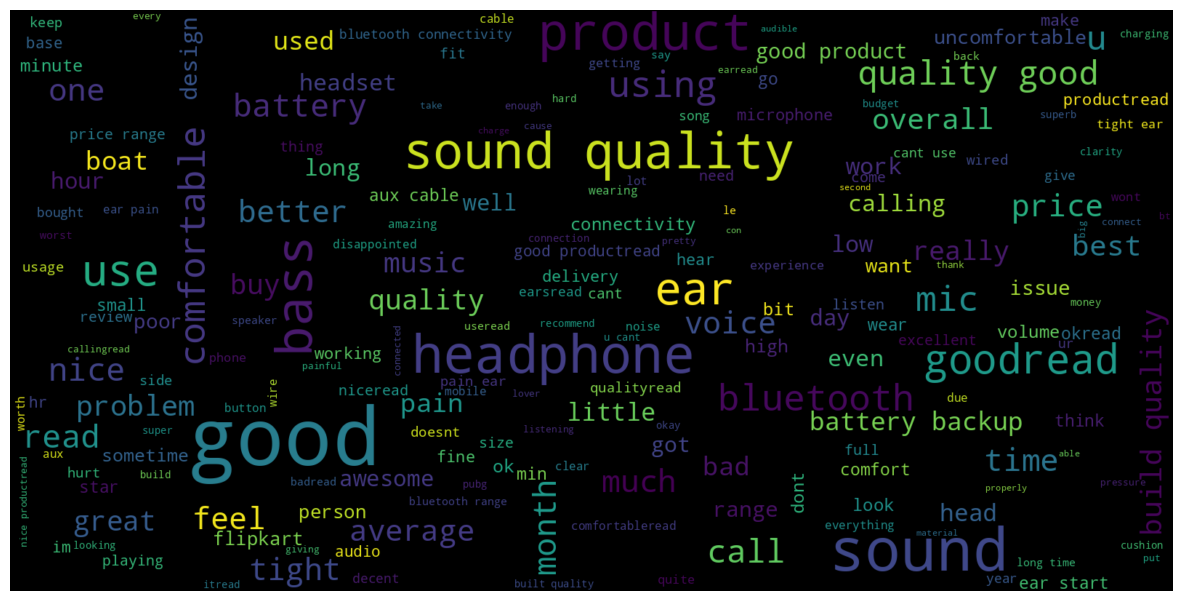

In [20]:
consolidated = ' '.join(
    word for word in df['review'][df['sentiment'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

Negative sentiment

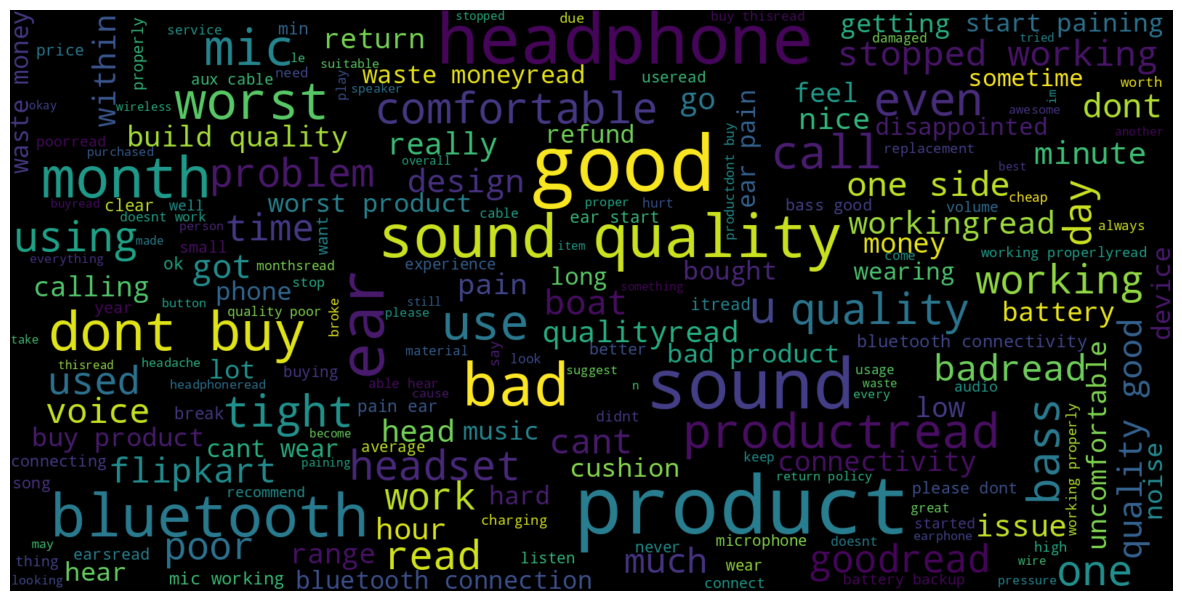

In [21]:
consolidated = ' '.join(
    word for word in df['review'][df['sentiment'] == 0].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

**Feature Selection**



Count Vectorizer


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X=cv.fit_transform(df['review'])
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'],
													test_size=0.4,
													stratify=df['sentiment'],
													random_state = 42)


**Decison Tree**

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)


DecisionTreeClassifier(random_state=0)

Training Accuracy


In [80]:
pred_dt = model.predict(X_train)
print(accuracy_score(y_train,pred_dt))

0.9781119465329992


Testing accuracy

In [81]:
pred_dt_test = model.predict(X_test)
print(accuracy_score(y_test,pred_dt_test))

0.813580556251566


**K Nearest Neighbor**

In [78]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=12, metric='manhattan')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=12)

Training Accuracy

In [83]:
pred_knn = classifier.predict(X_train)
print(accuracy_score(y_train,pred_knn))

0.8357560568086884


Testing Accuracy

In [79]:
pred_knn_test = classifier.predict(X_test)
print(accuracy_score(y_test,pred_knn_test))

0.8323728388874969


**SVM**

Linear SVM

In [112]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

Training Accuracy

In [116]:
pred_svcl = svc.predict(X_train)
print(accuracy_score(y_train,pred_svcl))

0.9553884711779449


Testing Accuracy

In [114]:
pred_svml_test = svc.predict(X_test)
print(accuracy_score(y_test,pred_svml_test))

0.848910047607116


Polynomial SVM

In [129]:
from sklearn.svm import SVC

svcp = SVC(kernel='poly', C=10)
svcp.fit(X_train, y_train)

SVC(C=10, kernel='poly')

Training Accuracy

---



In [131]:
pred_svcp = svcp.predict(X_train)
print(accuracy_score(y_train,pred_svcp))

0.9321637426900585


Testing Accuracy

In [130]:
pred_svmp_test = svcp.predict(X_test)
print(accuracy_score(y_test,pred_svmp_test))

0.813580556251566


Sigmoid SVM

In [138]:
svcs = SVC(kernel='sigmoid', C=1)
svcs.fit(X_train, y_train)

SVC(C=1, kernel='sigmoid')

Training Accuracy

In [140]:
pred_svcs = svcs.predict(X_train)
print(accuracy_score(y_train,pred_svcs))

0.8295739348370927


Testing Accuracy

In [139]:
pred_svms_test = svcs.predict(X_test)
print(accuracy_score(y_test,pred_svms_test))

0.8246053620646454


RBF SVM

In [149]:
svcr = SVC(kernel='rbf', C=10)
svcr.fit(X_train, y_train)

SVC(C=10)

Training Accuracy

In [151]:
pred_svcr = svcr.predict(X_train)
print(accuracy_score(y_train,pred_svcr))

0.9722639933166249


Testing Accuracy

In [150]:
pred_svmr_test = svcr.predict(X_test)
print(accuracy_score(y_test,pred_svmr_test))

0.8559258331245302


**Single Layer Perceptron**

In [175]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1, random_state=0)
clf.fit(X_train, y_train)


Perceptron(tol=1)

Training Accuracy

In [177]:
pred_pla = clf.predict(X_train)
print(accuracy_score(y_train,pred_pla))

0.9431913116123642


Testing Accuracy

In [176]:
pred_pla_test = clf.predict(X_test)
print(accuracy_score(y_test,pred_pla_test))

0.8461538461538461


**Multi Layer Perceptron**

In [180]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    max_iter=1000, random_state=32)


mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=32)

Training Accuracy

In [182]:
pred_mlp = mlp.predict(X_train)
print(accuracy_score(y_train,pred_mlp))

0.9781119465329992


Testing Accuracy

In [181]:
pred_mlp_test = mlp.predict(X_test)
print(accuracy_score(y_test,pred_mlp_test))

0.8376346780255575


TF-IDF Vectorizer

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X1=tfidf.fit_transform(df['review'])
print(X1.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [184]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, df['sentiment'],
													test_size=0.4,
													stratify=df['sentiment'],
													random_state = 42)


**Decision Tree**

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model1 = DecisionTreeClassifier(random_state=0)
model1.fit(X1_train,y1_train)


DecisionTreeClassifier(random_state=0)

Training Accuracy

In [188]:
pred_dt1 = model1.predict(X1_train)
print(accuracy_score(y1_train,pred_dt1))

0.9781119465329992


Testing Accuracy

In [187]:
pred_dt_test1 = model1.predict(X1_test)
print(accuracy_score(y1_test,pred_dt_test1))

0.8078175895765473


**K Nearest Neighbor**

In [193]:
from sklearn.neighbors import KNeighborsClassifier
classifier1= KNeighborsClassifier(n_neighbors=12, metric='manhattan')
classifier1.fit(X1_train, y1_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=12)

Training Accuracy

In [195]:
pred_knn1 = classifier1.predict(X1_train)
print(accuracy_score(y1_train,pred_knn1))

0.8274018379281537


Testing Accuracy

In [194]:
pred_knn_test1 = classifier1.predict(X1_test)
print(accuracy_score(y1_test,pred_knn_test1))

0.8241042345276873


**SVM**

RBF SVM


In [200]:
svcr1 = SVC(kernel='rbf', C=10)
svcr1.fit(X1_train, y1_train)

SVC(C=10)

Training Accuracy

In [202]:
pred_svcr1 = svcr1.predict(X1_train)
print(accuracy_score(y1_train,pred_svcr1))

0.9779448621553885


Testing Accuracy

In [201]:
pred_svmr_test1 = svcr1.predict(X1_test)
print(accuracy_score(y1_test,pred_svmr_test1))

0.855174141819093


Therefore, we can observe that both the feature selection techniques that we have used yield approximately same results.

Also, the Support Vector Machine with RBF kernel & Single Layer Perceptron Learning yield better accuracies.

In [213]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


classifiers = [
    ("Decision Tree", DecisionTreeClassifier(random_state=0)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=12, metric='manhattan')),
    ("Linear SVM", SVC(kernel='linear', C=1, probability=True)),
    ("Polynomial SVM", SVC(kernel='poly', C=10, probability=True)),
    ("Sigmoid SVM", SVC(kernel='sigmoid', C=1, probability=True)),
    ("RBF SVM", SVC(kernel='rbf', C=10, probability=True)),
    ("MLP", MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=32))
]

y_bin = label_binarize(y_test, classes=[0, 1, 2])
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_bin[0])):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(len(y_bin[0])), colors):
        plt.figure()
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                       ''.format(i, roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic for Class {} ({})'.format(i, name))
        plt.legend(loc="lower right")
        plt.savefig('ROC_{}_class_{}.png'.format(name.lower().replace(" ", "_"), i))
        plt.close()


Testing by giving input

In [222]:
test_data = pd.read_csv('/content/flipkart.csv')

In [275]:
import scipy as sp
review_input ="The product is realy good and value for money battery life is not up to the mark but its ok in this price range .it is best for online class and study ,you can play small games but not a big game like pubg and gta 5 butin low setting you can play*Packing is also good very genuine packing was there it takes time to reboot for only 5 to 7 seconds In light usage its to fast for office work and study it is best"
review_input = "worst quality speakers"
review_input = "something to enjoy music in budget and quality this is good.. ...and yes it is tight but with use it gets loosen little but not comfortable for big head, i feel my head is small so in a week i got comfortable with it and keeping the volume mid range you can use it for hours like i use for 2-3 hrs a day but keepi...READ MORE"
review_input = "average quality speaker and average battery life"
review_vectorized = cv.fit_transform([review_input])


if review_vectorized.shape[1] < 9495:
    zero_padding = sp.sparse.csr_matrix((review_vectorized.shape[0], 9495 - review_vectorized.shape[1]))
    review_vectorized = sp.sparse.hstack([review_vectorized, zero_padding])


predicted_label = clf.predict(review_vectorized)


print("Predicted label:", predicted_label)



Predicted label: [0]
